In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/digit_recognizer.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
39398      7       0       0       0       0       0       0       0       0   
20052      1       0       0       0       0       0       0       0       0   
6797       9       0       0       0       0       0       0       0       0   
19544      4       0       0       0       0       0       0       0       0   
21840      3       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
39398       0  ...         0         0         0         0         0   
20052       0  ...         0         0         0         0         0   
6797        0  ...         0         0         0         0         0   
19544       0  ...         0         0         0         0         0   
21840       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
39398         0         0         0         0         0  
20052         0         0         0         0         0  
6797          0         0         0         0         0  
19544         0         0         0         0         0  
21840         0         0         0         0         0  

[5 rows x 785 columns]

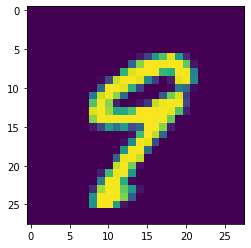

In [5]:
plt.imshow(df.iloc[11,1:].values.reshape(28,28))
plt.show()

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
import time

start  = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

25.673900604248047


In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9648809523809524

## Using PCA

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)

In [17]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [18]:
X_train_trf.shape

(33600, 200)

In [19]:
knn = KNeighborsClassifier()

In [20]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test_trf)

In [22]:
accuracy_score(y_test,y_pred)

0.9495238095238095

In [23]:
# for i in range(1,120):
#     pca = PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)

#     knn = KNeighborsClassifier()

#     knn.fit(X_train_trf,y_train)

#     y_pred = knn.predict(X_test_trf)

#     print(i,accuracy_score(y_test,y_pred))

In [24]:
# transforming to a 2-D coordinate sytstem

pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [25]:
X_train_trf

array([[-2.71863891, -0.48956577],
       [-0.67695901, -6.75380685],
       [-3.03321794,  6.50950387],
       ...,
       [ 2.14887979,  0.78056876],
       [ 1.05955722,  0.94800542],
       [17.70258355,  1.9621259 ]])

In [26]:
import plotly.express as px

y_train_trf = y_train.astype(str)

fig = px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],
                color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [27]:
# transforming in 3-D

pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [28]:
X_train_trf

array([[-2.71860833, -0.48937564,  1.13547072],
       [-0.67704804, -6.75601106, -2.33386135],
       [-3.03324622,  6.50983856,  7.49119624],
       ...,
       [ 2.14882996,  0.78011421, -0.74612108],
       [ 1.05958817,  0.9485152 ,  3.94908222],
       [17.70251939,  1.9600127 , -4.9417828 ]])

In [29]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [30]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [31]:
#Eigen values
pca.explained_variance_


array([40.67111197, 29.17023286, 26.74459487])

In [32]:
#Eigen vectors
pca.components_.shape

(3, 784)

## Using None Components

In [33]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [34]:
#Eigen vectors
pca.components_.shape

(784, 784)

In [35]:
#Eigen values
pca.explained_variance_.shape


(784,)

In [36]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

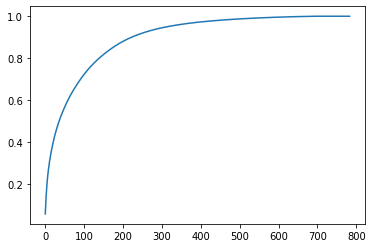

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))